## Integração dos dados

In [1]:
%matplotlib inline
import pandas as pd       
import numpy as np
import glob
import matplotlib.pyplot as plt

In [2]:
all_files = glob.glob('./dados/T299x/*.txt') 

columns_names = ('data','estacao','latitude','longitude','vento_zonal','vento_meridional','temperatura','temperatura_orvalho','pressao_reduzida','precipitacao')
columns_types = {'data':'category', 'estacao':'category','latitude':np.float64, 'longitude':np.float64, 'vento_zonal':np.float64, 
                 'vento_meridional':np.float64, 'temperatura':np.float64, 'temperatura_orvalho':np.float64 ,'pressao_reduzida':np.float64 ,'precipitacao':np.float64}

df = pd.concat([pd.read_table(file, delim_whitespace=True, header=None, skiprows=9, nrows=5500, names=columns_names, dtype=columns_types, usecols=range(10)) 
                for file in all_files], ignore_index=True)

In [3]:
df['data'] =  pd.to_datetime(df['data'], format='%y%m%d%H%M%S')
df.set_index(['data', 'estacao'], inplace=True)

In [4]:
df.head()

latitude  longitude  vento_zonal  vento_meridional  \
data       estacao                                                       
2014-01-01 SAAR      -32.905    -60.782       -0.524            -0.771   
           SABE      -34.565    -58.406       -2.960            -3.193   
           SACO      -31.315    -64.211       -1.035            -3.036   
           SAEZ      -34.822    -58.535       -1.804            -4.452   
           SAME      -32.833    -68.783       -1.440             1.574   

                    temperatura  temperatura_orvalho  pressao_reduzida  \
data       estacao                                                       
2014-01-01 SAAR          24.906               12.277          1004.030   
           SABE          20.170                8.122          1004.898   
           SACO          21.481               12.267          1004.862   
           SAEZ          20.213                7.250          1004.517   
           SAME          16.062                0.407          1003.729   

                    precipitacao  
data       estacao                
2014-01-01 SAAR           -999.0  
           SABE           -999.0  
           SACO           -999.0  
           SAEZ           -999.0  
           SAME           -999.0

In [5]:
df.tail(5)

latitude  longitude  vento_zonal  vento_meridional  \
data       estacao                                                       
2015-01-01 SBAN      -16.238    -48.972        0.422             0.703   
           SBAR      -10.985    -37.074       -6.996             0.671   
           SBAT       -9.870    -56.100       -0.032            -1.057   
           SBBE       -1.384    -48.479       -0.949            -1.099   
           SBBG      -31.390    -54.109       -2.226            -3.985   

                    temperatura  temperatura_orvalho  pressao_reduzida  \
data       estacao                                                       
2015-01-01 SBAN          24.027               23.157          1010.740   
           SBAR          23.461               21.241          1013.584   
           SBAT          27.450               26.118          1007.092   
           SBBE          25.395               23.877          1010.258   
           SBBG          25.695               24.778           999.419   

                    precipitacao  
data       estacao                
2015-01-01 SBAN            7.705  
           SBAR            0.000  
           SBAT           11.037  
           SBBE            0.812  
           SBBG            1.266

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 2007500 entries, (2014-01-01 00:00:00, SAAR) to (2015-01-01 00:00:00, SBBG)
Data columns (total 8 columns):
latitude               float64
longitude              float64
vento_zonal            float64
vento_meridional       float64
temperatura            float64
temperatura_orvalho    float64
pressao_reduzida       float64
precipitacao           float64
dtypes: float64(8)
memory usage: 130.2+ MB


In [7]:
df.describe().round(3)

,latitude,longitude,vento_zonal,vento_meridional,temperatura,temperatura_orvalho,pressao_reduzida,precipitacao
count,2007500.000,2007500.000,2007500.000,2007500.000,2007500.000,2007500.000,2007500.000,2007500.000
mean,-16.627,-53.274,-1.532,-0.067,20.909,16.298,1012.683,-243.566
std,14.995,12.769,3.159,2.743,8.342,8.929,6.310,429.894
min,-77.870,-90.280,-34.210,-26.866,-49.199,-999.000,939.163,-999.000
25%,-24.050,-62.320,-3.171,-1.463,18.035,13.797,1010.300,0.000
50%,-16.238,-51.180,-1.469,-0.138,22.369,18.648,1012.735,0.000
75%,-6.562,-43.820,-0.057,1.308,25.325,21.622,1015.701,0.142
max,14.900,-6.680,27.379,28.514,58.074,42.157,1041.928,68.492


## Primeira limpeza nos dados

In [8]:
df_final = df[~df.index.duplicated(keep='last')] # remove duplicated index showed below
df_final.loc['2014-01-02 00:00:00', 'SAAR'] # filter by index values

latitude                -32.905
longitude               -60.782
vento_zonal              -1.835
vento_meridional          2.942
temperatura              27.167
temperatura_orvalho      15.312
pressao_reduzida       1000.738
precipitacao           -999.000
Name: (2014-01-02 00:00:00, SAAR), dtype: float64

In [9]:
df_final.loc['2014'].tail()

latitude  longitude  vento_zonal  \
data                estacao                                     
2014-12-31 18:00:00 42058       14.90     -74.90      -10.841   
                    56908      -55.41     -59.01       -7.464   
                    71572      -60.04     -61.91       -0.589   
                    71648      -56.55     -38.19        3.251   
                    71650      -51.51     -26.79        5.025   

                             vento_meridional  temperatura  \
data                estacao                                  
2014-12-31 18:00:00 42058              -1.559       26.193   
                    56908               6.118        2.221   
                    71572               1.520       -1.109   
                    71648               1.872       -2.089   
                    71650               0.594       -1.054   

                             temperatura_orvalho  pressao_reduzida  \
data                estacao                                          
2014-12-31 18:00:00 42058                 22.886          1013.296   
                    56908                  0.743          1008.395   
                    71572                 -2.524          1014.689   
                    71648                 -2.108          1008.911   
                    71650                 -1.750          1011.360   

                             precipitacao  
data                estacao                
2014-12-31 18:00:00 42058           0.086  
                    56908           0.008  
                    71572           0.000  
                    71648           0.041  
                    71650           0.001

In [10]:
df_2014 = df_final.loc['2014']
df_2014.tail()

latitude  longitude  vento_zonal  \
data                estacao                                     
2014-12-31 18:00:00 42058       14.90     -74.90      -10.841   
                    56908      -55.41     -59.01       -7.464   
                    71572      -60.04     -61.91       -0.589   
                    71648      -56.55     -38.19        3.251   
                    71650      -51.51     -26.79        5.025   

                             vento_meridional  temperatura  \
data                estacao                                  
2014-12-31 18:00:00 42058              -1.559       26.193   
                    56908               6.118        2.221   
                    71572               1.520       -1.109   
                    71648               1.872       -2.089   
                    71650               0.594       -1.054   

                             temperatura_orvalho  pressao_reduzida  \
data                estacao                                          
2014-12-31 18:00:00 42058                 22.886          1013.296   
                    56908                  0.743          1008.395   
                    71572                 -2.524          1014.689   
                    71648                 -2.108          1008.911   
                    71650                 -1.750          1011.360   

                             precipitacao  
data                estacao                
2014-12-31 18:00:00 42058           0.086  
                    56908           0.008  
                    71572           0.000  
                    71648           0.041  
                    71650           0.001

In [11]:
df_2014.to_csv('./dados/T299x/2014/T299_2014.csv', float_format='%g')

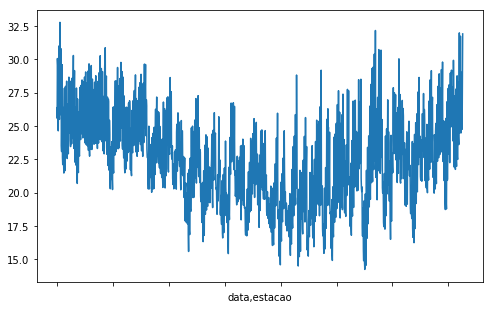

In [12]:
df_2014.loc[('2014','83743'),'temperatura'].plot(figsize=(8,5));

In [13]:
#363x4 = 1452
print('rio ', df_2014.loc[('2014','83743'),'precipitacao'].count())
print('curitiba ', df_2014.loc[('2014','83842'),'precipitacao'].count()) 
print('manaus ', df_2014.loc[('2014','82331'),'precipitacao'].count())
print('natal ', df_2014.loc[('2014','82598'),'precipitacao'].count())
print('brasilia ',df_2014.loc[('2014','83378'),'precipitacao'].count())

rio  1452
curitiba  1452
manaus  1452
natal  1452
brasilia  1452


In [14]:
df_2014_5_station = df_2014.loc[('2014',['83743','83842','82331','82598','83378']),]
df_2014_5_station

latitude  longitude  vento_zonal  \
data                estacao                                     
2014-01-01 00:00:00 82331       -3.13     -60.02       -2.805   
                    82598       -5.77     -35.20       -6.564   
                    83378      -15.87     -47.93        0.156   
                    83743      -22.92     -43.17       -1.491   
                    83842      -25.42     -49.27        3.864   
2014-01-01 06:00:00 82331       -3.13     -60.02       -1.010   
                    82598       -5.77     -35.20       -5.525   
                    83378      -15.87     -47.93       -0.826   
                    83743      -22.92     -43.17        0.228   
                    83842      -25.42     -49.27        0.275   
2014-01-01 12:00:00 82331       -3.13     -60.02       -1.262   
                    82598       -5.77     -35.20       -4.774   
                    83378      -15.87     -47.93       -2.212   
                    83743      -22.92     -43.17        0.707   
                    83842      -25.42     -49.27        1.268   
2014-01-01 18:00:00 82331       -3.13     -60.02       -0.602   
                    82598       -5.77     -35.20       -8.502   
                    83378      -15.87     -47.93        0.940   
                    83743      -22.92     -43.17       -1.057   
                    83842      -25.42     -49.27        0.687   
2014-01-02 00:00:00 82331       -3.13     -60.02       -3.438   
                    82598       -5.77     -35.20       -5.695   
                    83378      -15.87     -47.93        2.197   
                    83743      -22.92     -43.17       -5.204   
                    83842      -25.42     -49.27        1.874   
2014-01-02 06:00:00 82331       -3.13     -60.02       -1.129   
                    82598       -5.77     -35.20       -4.463   
                    83378      -15.87     -47.93       -1.008   
                    83743      -22.92     -43.17       -0.212   
                    83842      -25.42     -49.27       -0.533   
...                               ...        ...          ...   
2014-12-30 12:00:00 82331       -3.13     -60.02       -1.516   
                    82598       -5.77     -35.20       -4.582   
                    83378      -15.87     -47.93        1.295   
                    83743      -22.92     -43.17        0.539   
                    83842      -25.42     -49.27        0.982   
2014-12-30 18:00:00 82331       -3.13     -60.02       -0.361   
                    82598       -5.77     -35.20       -7.609   
                    83378      -15.87     -47.93        0.364   
                    83743      -22.92     -43.17       -0.872   
                    83842      -25.42     -49.27       -0.428   
2014-12-31 00:00:00 82331       -3.13     -60.02       -1.150   
                    82598       -5.77     -35.20       -6.067   
                    83378      -15.87     -47.93        3.410   
                    83743      -22.92     -43.17       -2.073   
                    83842      -25.42     -49.27        2.363   
2014-12-31 06:00:00 82331       -3.13     -60.02        0.036   
                    82598       -5.77     -35.20       -4.630   
                    83378      -15.87     -47.93        0.554   
                    83743      -22.92     -43.17       -0.439   
                    83842      -25.42     -49.27        0.501   
2014-12-31 12:00:00 82331       -3.13     -60.02       -1.042   
                    82598       -5.77     -35.20       -5.674   
                    83378      -15.87     -47.93        0.890   
                    83743      -22.92     -43.17       -0.710   
                    83842      -25.42     -49.27        1.277   
2014-12-31 18:00:00 82331       -3.13     -60.02       -1.013   
                    82598       -5.77     -35.20       -7.826   
                    83378      -15.87     -47.93        1.248   
                    83743      -22.92     -43.17       -2.610   

In [15]:
df_2014_5_station.to_csv('./dados/T299x/2014/T299_2014_5_station.csv', float_format='%g')

In [16]:
df_2014_5_station.loc[('20/05/14', '83743'),]

,,latitude,longitude,vento_zonal,vento_meridional,temperatura,temperatura_orvalho,pressao_reduzida,precipitacao
data,estacao,,,,,,,,
2014-05-20 12:00:00,83743,-22.92,-43.17,0.568,-1.188,24.382,21.246,1018.518,-999.000
2014-05-20 18:00:00,83743,-22.92,-43.17,-1.278,1.950,24.298,19.710,1016.832,0.093


In [17]:
new_df = df_2014_5_station.reset_index() 

In [18]:
#new_df.reset_index(level=0, drop=True)

In [19]:
new_df.set_index(pd.DatetimeIndex(new_df['data']), inplace=True)
new_df.drop('data', axis=1, inplace=True)
new_df.head()

,estacao,latitude,longitude,vento_zonal,vento_meridional,temperatura,temperatura_orvalho,pressao_reduzida,precipitacao
data,,,,,,,,,
2014-01-01,82331,-3.13,-60.02,-2.805,-0.006,25.158,19.060,1008.283,-999.0
2014-01-01,82598,-5.77,-35.20,-6.564,3.662,23.783,18.854,1012.197,-999.0
2014-01-01,83378,-15.87,-47.93,0.156,-0.935,20.940,17.072,1012.405,-999.0
2014-01-01,83743,-22.92,-43.17,-1.491,-2.386,26.367,20.565,1008.594,-999.0
2014-01-01,83842,-25.42,-49.27,3.864,0.164,22.474,20.621,1008.993,-999.0


In [20]:
new_df.resample('M').mean()

,latitude,longitude,vento_zonal,vento_meridional,temperatura,temperatura_orvalho,pressao_reduzida,precipitacao
data,,,,,,,,
2014-01-31,-14.622,-47.118,-2.448571,0.241235,24.326332,21.028144,1012.192334,-248.429884
2014-02-28,-14.622,-47.118,-2.632875,0.104025,24.047800,21.069751,1011.663920,-253.068793
2014-03-31,-14.622,-47.118,-2.144274,0.210361,23.365916,21.199155,1012.258069,-248.125773
2014-04-30,-14.622,-47.118,-1.892605,0.635405,22.793352,20.509827,1013.443347,-248.666782
2014-05-31,-14.622,-47.118,-1.700887,0.867784,21.739654,18.973026,1014.345021,-252.998972
2014-06-30,-14.622,-47.118,-1.997898,0.603014,21.531425,18.167300,1015.523180,-253.449142
2014-07-31,-14.622,-47.118,-2.407698,0.970110,21.030766,16.491132,1018.109813,-249.468340
2014-08-31,-14.622,-47.118,-2.324735,0.837663,21.491021,15.435844,1016.491140,-249.431574
2014-09-30,-14.622,-47.118,-2.543156,0.366797,22.832832,16.971514,1014.353854,-253.578131


In [21]:
group_df_day = new_df['estacao'].groupby(new_df.index.date).count() #igual resample_df_day = new_df.resample(D).count()

In [22]:
group_df_day[group_df_day < 20]

2014-02-13    10
2014-05-20    10
2014-06-10    10
2014-09-02    10
Name: estacao, dtype: int64

In [23]:
new_df.loc['2014-09-02'] #12 e 18

,estacao,latitude,longitude,vento_zonal,vento_meridional,temperatura,temperatura_orvalho,pressao_reduzida,precipitacao
data,,,,,,,,,
2014-09-02 12:00:00,82331,-3.13,-60.02,-1.637,-1.172,37.720,30.405,1011.730,-999.000
2014-09-02 12:00:00,82598,-5.77,-35.20,-4.970,3.411,27.762,22.592,1015.485,-999.000
2014-09-02 12:00:00,83378,-15.87,-47.93,0.558,-0.393,34.078,21.512,1014.902,-999.000
2014-09-02 12:00:00,83743,-22.92,-43.17,-0.427,0.070,24.513,21.045,1016.665,-999.000
2014-09-02 12:00:00,83842,-25.42,-49.27,-2.726,-1.215,20.157,19.210,1015.880,-999.000
2014-09-02 18:00:00,82331,-3.13,-60.02,-2.671,-0.259,44.889,23.794,1005.803,0.000
2014-09-02 18:00:00,82598,-5.77,-35.20,-7.748,0.722,31.072,25.112,1012.520,0.000
2014-09-02 18:00:00,83378,-15.87,-47.93,-1.213,-2.628,32.512,15.379,1009.513,0.022
2014-09-02 18:00:00,83743,-22.92,-43.17,-2.831,3.283,24.899,19.830,1014.906,0.000


In [24]:
df_2014.reset_index(level=1, inplace=True)
df_2014.head()

,estacao,latitude,longitude,vento_zonal,vento_meridional,temperatura,temperatura_orvalho,pressao_reduzida,precipitacao
data,,,,,,,,,
2014-01-01,SAAR,-32.905,-60.782,-0.524,-0.771,24.906,12.277,1004.030,-999.0
2014-01-01,SABE,-34.565,-58.406,-2.960,-3.193,20.170,8.122,1004.898,-999.0
2014-01-01,SACO,-31.315,-64.211,-1.035,-3.036,21.481,12.267,1004.862,-999.0
2014-01-01,SAEZ,-34.822,-58.535,-1.804,-4.452,20.213,7.250,1004.517,-999.0
2014-01-01,SAME,-32.833,-68.783,-1.440,1.574,16.062,0.407,1003.729,-999.0


In [25]:
df_2014.groupby(df_2014.estacao).count()

,latitude,longitude,vento_zonal,vento_meridional,temperatura,temperatura_orvalho,pressao_reduzida,precipitacao
estacao,,,,,,,,
13001,1452,1452,1452,1452,1452,1452,1452,1452
13009,1452,1452,1452,1452,1452,1452,1452,1452
15001,1452,1452,1452,1452,1452,1452,1452,1452
15002,1452,1452,1452,1452,1452,1452,1452,1452
15006,1452,1452,1452,1452,1452,1452,1452,1452
15505,1452,1452,1452,1452,1452,1452,1452,1452
15509,1452,1452,1452,1452,1452,1452,1452,1452
15607,1452,1452,1452,1452,1452,1452,1452,1452
15644,1452,1452,1452,1452,1452,1452,1452,1452
